In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = dd.read_csv("H:\COSC4427_dataset_project\*.csv",parse_dates=True)
data

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
npartitions=60,,,,,,,,,,,,,,,
,int64,object,object,int64,object,float64,float64,int64,object,float64,float64,int64,object,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1


In [4]:
data.tail()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
11689,1750,2020-12-31 23:07:44.0030,2020-12-31 23:36:54.4710,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0
11690,1519,2020-12-31 23:18:00.2630,2020-12-31 23:43:19.8590,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0
11691,1761,2020-12-31 23:31:09.4620,2021-01-01 00:00:31.3290,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1
11692,637,2020-12-31 23:35:45.4640,2020-12-31 23:46:22.7300,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0
11693,1607,2020-12-31 23:48:34.5750,2021-01-01 00:15:22.3090,3267,Morris Canal,40.712419,-74.038526,3267,Morris Canal,40.712419,-74.038526,48742,Subscriber,1982,1


In [5]:
df = data.copy().compute()
print(df.isnull().sum())
df.shape

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                    497
Birth Year                 38614
Gender                         0
dtype: int64


(1638153, 15)

In [6]:
# we see the data have null value in column: User Type and Birth Year.
# Lets drop the null value in User Type first, cause it's sum is smallest.
# we can only drop cause the User Type have only 2 values, random fill in doesnt make sense for data
df.dropna(subset=['User Type'], inplace=True)
# for Birth Year we can fill null value by means, cause this column has various number 
df['Birth Year'].fillna(df['Birth Year'].median(),inplace=True)
print(df.isnull().sum())

Trip Duration              0
Start Time                 0
Stop Time                  0
Start Station ID           0
Start Station Name         0
Start Station Latitude     0
Start Station Longitude    0
End Station ID             0
End Station Name           0
End Station Latitude       0
End Station Longitude      0
Bike ID                    0
User Type                  0
Birth Year                 0
Gender                     0
dtype: int64


In [7]:
df1 = df.copy()
print(df1.shape)
#df_dup1['Start Time'] = dd.to_datetime(df_dup1['Start Time'], errors='coerce')
df1['Year'] = pd.to_datetime(df['Start Time']).dt.year
df1['Month'] = pd.to_datetime(df1['Start Time']).dt.month
df1['Day'] = pd.to_datetime(df1['Start Time']).dt.day
df1['Time'] = pd.to_datetime(df['Start Time']).dt.time
group1 = df1['Trip Duration'].groupby(df1['Year'])
group2 = df1['Trip Duration'].groupby([df1['Year'],df1['Month']])
#df_dup1_group['year'].unique()
table1 = group1.agg(['count'])
#table1.set_index('Year')
print(table1)

#group2.count().compute()


(1637656, 15)
       count
Year        
2016  247204
2017  294811
2018  353892
2019  404947
2020  336802


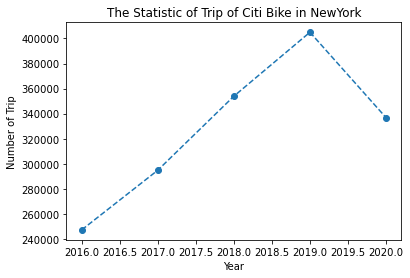

In [8]:
import matplotlib.pyplot as plt
plt.plot(table1, marker='o', linestyle='dashed')
plt.title("The Statistic of Trip of Citi Bike in NewYork")
plt.xlabel('Year')
plt.ylabel('Number of Trip')
plt.show()

In [9]:
table2 = group2.agg(['count'])
table2 = pd.DataFrame(table2)
table2 = table2.pivot_table(values='count', index='Month', columns='Year').sort_index()
table2

Year,2016,2017,2018,2019,2020
Month,,,,,
1,7479,12908,12677,19676,26020
2,8250,13960,15104,18565,22962
3,13499,12168,17109,23606,17719
4,16311,21186,23634,33056,9268
5,19480,25966,34456,36135,25077
6,23943,32060,40937,39430,36921
7,24430,33573,42268,43746,38680
8,34095,35472,44432,48711,43267
9,33300,33119,39022,49244,40382


H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
H:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

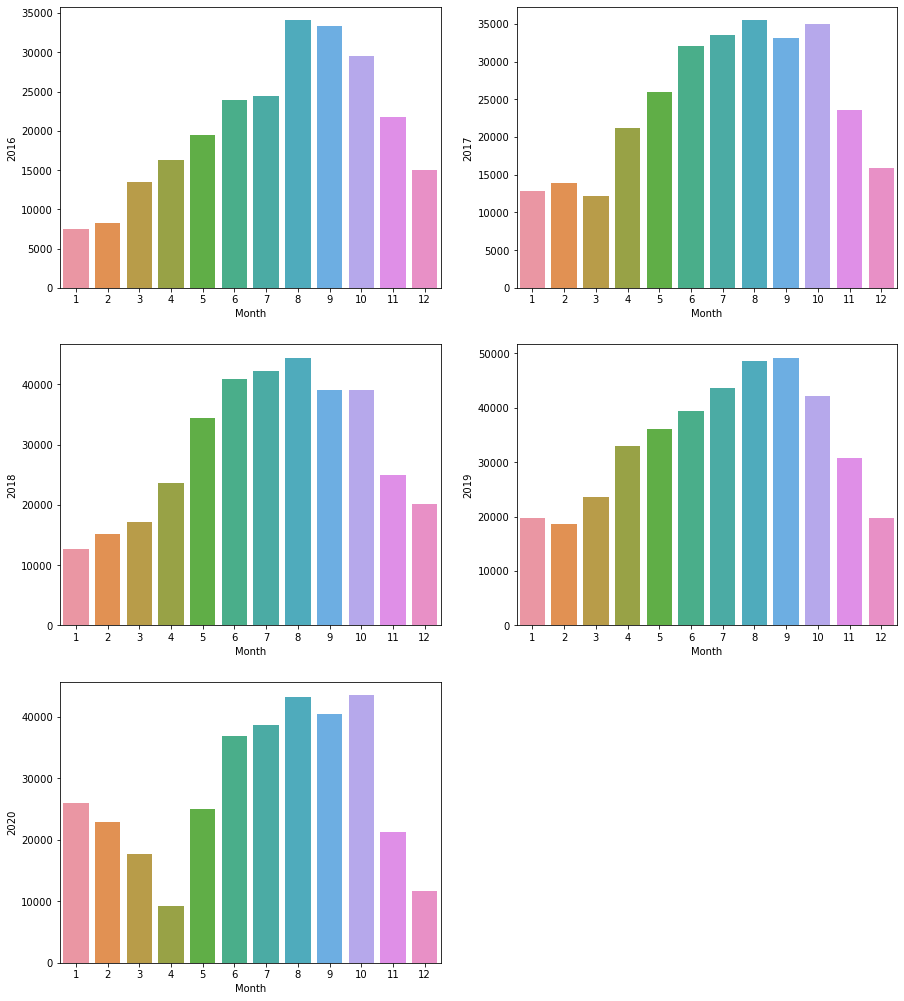

In [10]:
plt.figure(figsize = (15,30))
for i in enumerate(table2.columns):
    plt.subplot(5,2,i[0]+1)
    sns.barplot(table2.index, i[1], data=table2)

In [11]:
df2 = df1.copy()
df2.loc[(df2.Gender == 0),'Gender'] = 'Unknown'
df2.loc[(df2.Gender == 1),'Gender'] = 'Male'
df2.loc[(df2.Gender == 2),'Gender'] = 'Female'
df2.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Year,Month,Day,Time
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,Male,2016,4,1,00:16:13
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,Male,2016,4,1,00:32:48
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,Male,2016,4,1,02:00:33
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,Male,2016,4,1,02:11:43
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,Male,2016,4,1,02:18:01


In [12]:
table3 = pd.crosstab([df2['Year'],df2['Month']], df2['Gender'],margins=True).sort_index()
table3

Gender      Female     Male  Unknown      All
Year Month                                   
2016 1        1474     5697      308     7479
     2        1629     6283      338     8250
     3        2648     9924      927    13499
     4        3154    11341     1816    16311
     5        3764    13917     1799    19480
...            ...      ...      ...      ...
2020 9       10538    23055     6789    40382
     10      10893    26277     6367    43537
     11       5221    13219     2835    21275
     12       2568     7765     1361    11694
All         363889  1132926   140841  1637656

[61 rows x 4 columns]

In [13]:
group4 = df2['Trip Duration'].groupby([df2['Year'],df2['Month'],df['Gender']])
table4 = group4.agg(['count']).sort_index()
table4 = table4.pivot_table(values='count',index=['Year','Month'],columns='Gender')
#table4_dup = pd.melt(table4, id_vars='Gender', var_name='Gender',value_name='count')
#table4_dup
table4

Gender         0      1      2
Year Month                    
2016 1       308   5697   1474
     2       338   6283   1629
     3       927   9924   2648
     4      1816  11341   3154
     5      1799  13917   3764
     6      2208  17019   4716
     7      2267  17315   4848
     8      3561  23700   6834
     9      2847  23292   7161
     10     1890  21307   6364
     11     1260  15813   4710
     12      680  11327   3066
2017 1       443  10003   2462
     2       893  10397   2670
     3       567   9171   2430
     4      2072  15093   4021
     5      2035  18611   5320
     6      2622  22656   6782
     7      3079  23331   7163
     8      2829  25131   7512
     9      2546  23364   7209
     10     2321  24970   7628
     11      987  17656   4939
     12      531  12264   3103
2018 1       428   9798   2451
     2       498  11849   2757
     3       794  13231   3084
     4      1676  17207   4751
     5      2539  24839   7078
     6      3105  28787   9045
     7      3348  29463   9457
     8      2996  31529   9907
     9      2774  27790   8458
     10     1600  28889   8649
     11      939  18588   5383
     12      719  15161   4325
2019 1       576  14929   4171
     2       595  14334   3636
     3      1045  17811   4750
     4      2096  23964   6996
     5      2587  25846   7702
     6      3337  27182   8911
     7      3460  30411   9875
     8      4158  33099  11454
     9      3778  33417  12049
     10     2450  29343  10460
     11     1495  21768   7534
     12      825  14302   4601
2020 1      1143  18536   6341
     2       999  16464   5499
     3      1499  12021   4199
     4      1357   5709   2202
     5      5555  12765   6757
     6      7914  19181   9826
     7      7862  20945   9873
     8      8516  23870  10881
     9      6789  23055  10538
     10     6367  26277  10893
     11     2835  13219   5221
     12     1361   7765   2568

Text(0.5, 1.0, '2020')

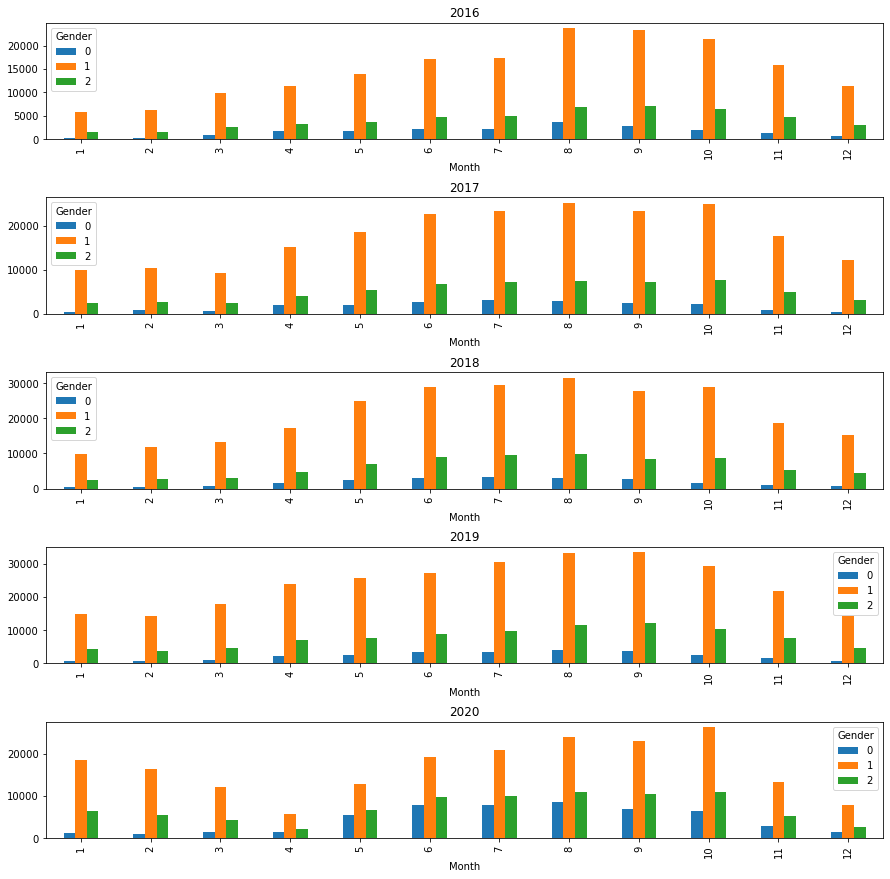

In [14]:
fig, axes = plt.subplots(5,1)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
table4.loc[2016].plot.bar(ax=axes[0],figsize=(15,15))
axes[0].set_title("2016")
table4.loc[2017].plot.bar(ax=axes[1],figsize=(15,15))
axes[1].set_title("2017")
table4.loc[2018].plot.bar(ax=axes[2],figsize=(15,15))
axes[2].set_title("2018")
table4.loc[2019].plot.bar(ax=axes[3],figsize=(15,15))
axes[3].set_title("2019")
table4.loc[2020].plot.bar(ax=axes[4],figsize=(15,15))
axes[4].set_title("2020")


In [15]:
#here to the the common route of subcribers often drive
route_df = df1.groupby(['Start Station Name', 'End Station Name']).size().reset_index(name='Number of Trips')
print(route_df)

     Start Station Name       End Station Name  Number of Trips
0     5 Corners Library       12 Ave & W 40 St                1
1     5 Corners Library      5 Corners Library              416
2     5 Corners Library            Astor Place               85
3     5 Corners Library  Baldwin at Montgomery              251
4     5 Corners Library           Bayside Park                1
...                 ...                    ...              ...
4007            York St        W 24 St & 7 Ave                1
4008            York St           WS Don't Use                7
4009            York St              Warren St              419
4010            York St          Washington St              180
4011            York St                York St              765

[4012 rows x 3 columns]


In [16]:
#graph
route_df = route_df.sort_values(by=['Number of Trips'],ascending=False)
route_df.head(20)

,Start Station Name,End Station Name,Number of Trips
1528,Hamilton Park,Grove St PATH,32280
1443,Grove St PATH,Hamilton Park,23099
408,Brunswick St,Grove St PATH,18719
2691,McGinley Square,Sip Ave,17172
2075,Jersey & 6th St,Grove St PATH,15465
3603,Sip Ave,McGinley Square,14571
3716,Van Vorst Park,Grove St PATH,14130
2839,Morris Canal,Exchange Place,14078
344,Brunswick & 6th,Grove St PATH,14073
989,Dixon Mills,Grove St PATH,13681


In [17]:
#if u guys want to make a graph for this, go ahead

In [18]:
#
df3 = df1.copy()
#station_march_ID1 = df2['Start Station Name']
#station_march_ID2 = df2['End Station Name']
#station_march_ID = station_march_ID1.append(station_march_ID2, ignore_index=True)
#station_march_ID=station_march_ID.unique()
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#station_march_encode = pd.DataFrame(station_march_ID, columns=['Station Name'])
#station_march_encode['Encode'] = label_encoder.fit_transform(station_march_encode['Station Name'])

#df2['Start Station Name'] = label_encoder.fit_transform(df2['Start Station Name'])
#df2['End Station Name'] = label_encoder.fit_transform(df2['End Station Name'])
#print(df2)
#print(station_march_encode)
#station_march_ID.to_csv('temp.csv', index=False)

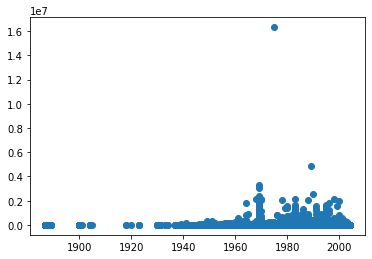

In [19]:
plt.scatter(df3['Birth Year'],df3['Trip Duration'])

<AxesSubplot:>

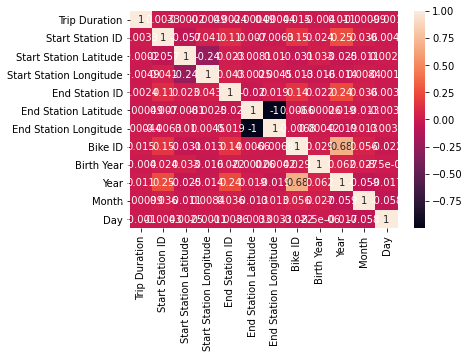

In [20]:
sns.heatmap(df2.corr(), annot=True)

In [21]:
#The above graph shows unbelievable customer who was born between 1900 and 1920 (120 and 100 years old) using bike service
#I am not sure if this is right. So i decide to drop those data who born before 1900 to 1940 (who is over 80)
df1 = df1.drop(df.index[(df['Birth Year'] < 1940)])
#df
#print(df.loc[df2['Birth Year'] < 1940])
# well, if u guys think the old dudes data is wrong, can go ahead to drop it.
df3 = df1.copy()
df3['Age'] = 2020 - df3['Birth Year']
df3['Age'] = df3['Age'].astype(int)
df2.shape

(1637656, 19)

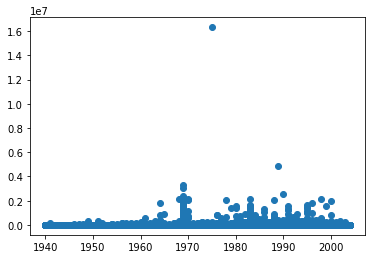

In [22]:
plt.scatter(df3['Birth Year'],df3['Trip Duration'])

In [23]:
#here is i want to see human age classifications on trip duration.
# the human age classifies to 4 group: child(0-12), adolescence(13-18), adult(19-59), senior adult(>60)
df4 = df3.copy()
child = np.arange(0,13)
adolescence = np.arange(13,19)
adult = np.arange(19,60)
senior = np.arange(60, 81)

df4['Age'] = df4['Age'].replace(to_replace=child, value=0)
df4['Age'] = df4['Age'].replace(to_replace=adolescence, value=1)
df4['Age'] = df4['Age'].replace(to_replace=adult, value=2)
df4['Age'] = df4['Age'].replace(to_replace=senior, value=3)

print(df4['Age'].unique())

[2 3 1]


In [24]:
#pls install geopy first 
#open terminal and type
#pip install geopy
#this one will take long time cause PC has to calculate more than 1 million rows.
from geopy.distance import geodesic
dist = []
for i in range(len(df4)):
    temp = geodesic((df4.iloc[i,5],df4.iloc[i,6]),(df4.iloc[i,9],df4.iloc[i,10])).m
    dist.append(temp)

In [25]:
#print(df4.iloc[i,6])
df4 = df4.assign(Distance_meters = dist)
df4.shape

(1596722, 21)

In [26]:
print(df4.groupby([df4['Distance_meters'] == 0]).size())
# We have problem in here, the some data has distance = 0, this is because the distance we calculate is 
# base one the difference of station longitude and latitude. 
# if the custormer or subcriber uses the service in leisure time and going around the start station and 
# come back the place, the distance calculated is 0.
# with this we have 7.13% data distance is false.

Distance_meters
False    1490414
True      106308
dtype: int64


In [27]:
#graph between the distance and arge group

group_dist_age_count = df4.groupby(['Age','Distance_meters']).size().reset_index(name='Number of Trips')
#group_dist_age_count.columns
group_dist_age_count.head(10)
#print(group_dist_age_count['Number of Trips'].unique())
df4_mean = group_dist_age_count.groupby('Age', as_index=False).mean()
df4_mean = df4_mean.sort_values(by='Number of Trips')

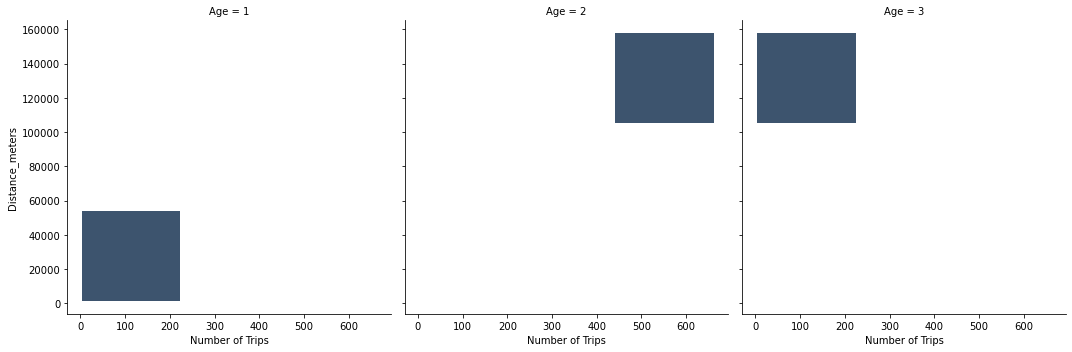

In [28]:
sns.displot(x='Number of Trips',y='Distance_meters',col='Age', data=df4_mean,)
plt.show()

In [29]:
# our regression is to predict the next two years of total service Citi Bike by monthly
#print(df1.head())
df5 = df4[['Gender','Age','Year','Month','Day']]
df5_dup1 = df5.groupby(['Year','Month']).size().reset_index(name='Total Trip per Month')
df5_dup1 = df5_dup1.set_index(['Year','Month'])
df5_dup1

Total Trip per Month
Year Month                      
2016 1                      7215
     2                      7958
     3                     13040
     4                     15768
     5                     18863
     6                     23256
     7                     23736
     8                     33292
     9                     32502
     10                    28818
     11                    21129
     12                    14554
2017 1                     12468
     2                     13490
     3                     11752
     4                     20539
     5                     25257
     6                     31277
     7                     32773
     8                     34653
     9                     32325
     10                    34106
     11                    22898
     12                    15361
2018 1                     12248
     2                     14584
     3                     16546
     4                     22950
     5                     33648
     6                     40087
     7                     41413
     8                     43572
     9                     38182
     10                    38298
     11                    24209
     12                    19575
2019 1                     19053
     2                     17965
     3                     22922
     4                     32262
     5                     35311
     6                     38588
     7                     42888
     8                     47849
     9                     48381
     10                    41398
     11                    30033
     12                    19105
2020 1                     25311
     2                     22284
     3                     17141
     4                      8947
     5                     24374
     6                     36094
     7                     37841
     8                     42411
     9                     39536
     10                    42763
     11                    20627
     12                    11296

<AxesSubplot:xlabel='Year,Month'>

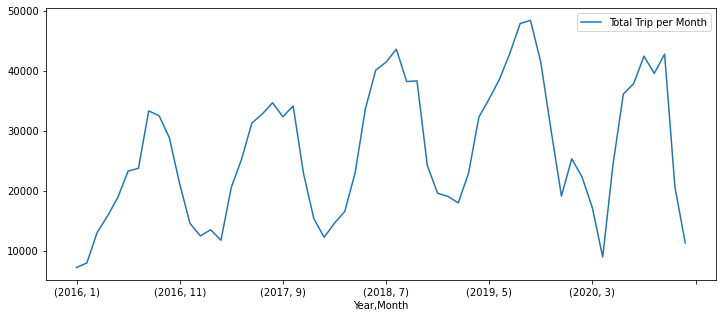

In [30]:
df5_dup1.plot(figsize=(12,5))

In [31]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df5_dup1)

In [32]:
def adfuller_test(Total_trips):
    result = adfuller(Total_trips)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observation Used','Critical value']
    for value,label in zip (result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject")
    else:
        print("weak evidence against null hypothesis, time series hase a unit root")

In [33]:
adfuller_test(df5_dup1['Total Trip per Month'])

ADF Test Statistic:-2.799893481194512
p-value:0.058288985132893184
#Lags Used:6
Number of Observation Used:53
Critical value:{'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
weak evidence against null hypothesis, time series hase a unit root


In [34]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [35]:
# using auto_arima to find the best ARIMA order 
stepwise_fit = auto_arima(df5_dup1['Total Trip per Month'], trace=True,supperess_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1218.377, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1291.640, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1231.094, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1248.385, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1404.532, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1217.710, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1235.902, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1223.436, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1221.863, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1218.063, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1218.811, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1212.659, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1220.942, Time=0.09 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1202.523, Time=0.15 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 0, 4)   Log Likelihood                -593.261
Date:                Sat, 31 Jul 2021   AIC                           1202.523
Time:                        10:35:34   BIC                           1219.278
Sample:                             0   HQIC                          1209.077
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7504.2795    657.227     11.418      0.000    6216.138    8792.421
ar.L1          1.7256      0.020     87.977      0.000       1.687       1.764
ar.L2         -0.9960      0.012    -83.452      0.000      -1.019      -0.973
ma.L1         -0.8821      0.240     -3.682      0.000      -1.352      -0.413
ma.L2          0.1673      0.267      0.626      0.531      -0.357       0.691
ma.L3         -0.0824      0.244     -0.337      0.736      -0.561       0.397
ma.L4          0.4983      0.198      2.516      0.012       0.110       0.886
sigma2      2.528e+07      0.013   1.93e+09      0.000    2.53e+07    2.53e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.79   Prob(JB):                         0.99
Heteroskedasticity (H):               2.01   Skew:                             0.01
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.53e+25. Standard errors may be unstable.
"""

In [36]:
# I am testing how ARIMA model predict with train data from 2016-2019
# and the test value is the total service in 2020
from statsmodels.tsa.arima_model import ARIMA
train = df5_dup1.iloc[:-12]
test = df5_dup1.iloc[-12:]
print(df5_dup1.shape)
print(train.shape, test.shape)

(60, 1)
(48, 1) (12, 1)


In [37]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train['Total Trip per Month'],order=(2,0,4),seasonal_order=(1,1,1,12))
model = model.fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                 Total Trip per Month   No. Observations:                   48
Model:             SARIMAX(2, 0, 4)x(1, 1, [1], 12)   Log Likelihood                -341.312
Date:                              Sat, 31 Jul 2021   AIC                            700.624
Time:                                      10:35:34   BIC                            714.876
Sample:                                           0   HQIC                           705.598
                                               - 48                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0053      0.456      0.012      0.991      -0.888       0.898
ar.L2          0.9946      0.328      3.037      0.002       0.353       1.637
ma.L1          0.3337      1.989      0.168      0.867      -3.565       4.232
ma.L2         -0.8262      0.711     -1.162      0.245      -2.220       0.567
ma.L3         -0.3309      0.225     -1.472      0.141      -0.772       0.110
ma.L4         -0.1705      0.270     -0.632      0.527      -0.699       0.358
ar.S.L12       0.9796     28.677      0.034      0.973     -55.227      57.186
ma.S.L12      -0.9841     29.480     -0.033      0.973     -58.764      56.796
sigma2      1.146e+07   2.01e-06   5.69e+12      0.000    1.15e+07    1.15e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.98   Prob(JB):                         0.31
Heteroskedasticity (H):               1.21   Skew:                            -0.11
Prob(H) (two-sided):                  0.74   Kurtosis:                         1.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.47e+30. Standard errors may be unstable.
"""

In [148]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end,typ='levels')
pred.index = df5_dup1.index[start:end+1]
print(pred)

Year  Month
2020  1        22007.230620
      2        21409.759878
      3        27139.897534
      4        36458.139652
      5        39481.423552
      6        42761.902407
      7        47028.425492
      8        51987.811009
      9        52501.331973
      10       45560.005938
      11       34221.434249
      12       23347.915325
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Year,Month'>

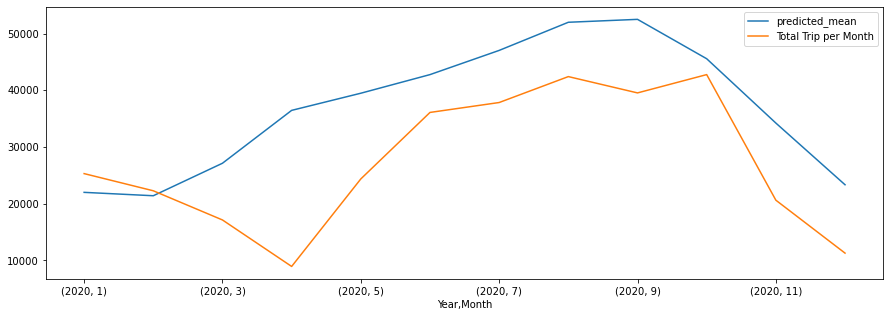

In [149]:
# the graph comparing the actual values and predicted value in 2020
pred.plot(legend=True)
test['Total Trip per Month'].plot(figsize=(15,5),legend=True)

In [41]:
# I am trying to see the error between actual value and predicted value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Total Trip per Month']))
print(rmse)

#from sklearn.metrics import accuracy_score
#accuracy_score(test['Total Trip per Day'],pred)

12326.528271846933


In [142]:
# we begin to predict the 2021-2022 total trips per month of bike serive
import statsmodels.api as sm
model2 = sm.tsa.statespace.SARIMAX(df5_dup1,order=(2,0,4),seasonal_order=(1,1,1,12))
model2 = model2.fit()

In [143]:
index_future_dates = pd.date_range(start='2021-1',end='2022-12',freq='MS')
pred = model2.predict(start=len(df5_dup1),end=len(df5_dup1)+23,typ='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2021-01-01    13687.963554
2021-02-01    16515.393329
2021-03-01    17527.027402
2021-04-01    18063.563725
2021-05-01    27847.309175
2021-06-01    35654.576507
2021-07-01    38461.194986
2021-08-01    43071.085813
2021-09-01    41476.219676
2021-10-01    40260.488959
2021-11-01    23425.495052
2021-12-01    13878.730070
2022-01-01    17594.838837
2022-02-01    17744.823228
2022-03-01    16527.078555
2022-04-01    14234.437030
2022-05-01    25895.839006
2022-06-01    35022.152244
2022-07-01    37504.266700
2022-08-01    42132.513272
2022-09-01    40139.467228
2022-10-01    40411.359065
2022-11-01    21856.702890
2022-12-01    12407.297430
Freq: MS, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Year,Month'>

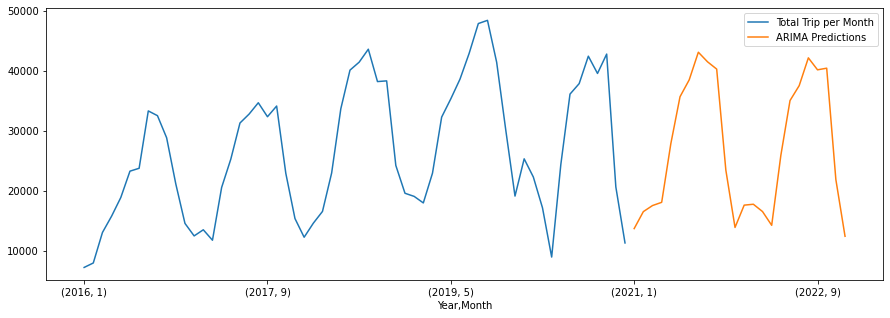

In [144]:
# Graph of total bike service 2016-2020 and the future service 2021-2022
future_df = pred.to_frame()
future_df.index = pd.MultiIndex.from_arrays([future_df.index.year, future_df.index.month], names=['Year','Month'])
future_df = pd.concat([df5_dup1, future_df])
future_df.plot(figsize=(15,5))

In [125]:
# Predict gender performance in the next two years
# Unknown df
df5_dup2 = df5[df5['Gender']==0]
df5_dup2 = df5_dup2.groupby(['Year','Month']).size().reset_index(name='Total Trip per Month')
df5_dup2 = df5_dup2.set_index(['Year','Month'])
# Male df
df5_dup3 = df5[df5['Gender']==1]
df5_dup3 = df5_dup3.groupby(['Year','Month']).size().reset_index(name='Total Trip per Month')
df5_dup3 = df5_dup3.set_index(['Year','Month'])
# FMale df
df5_dup4 = df5[df5['Gender']==2]
df5_dup4 = df5_dup4.groupby(['Year','Month']).size().reset_index(name='Total Trip per Month')
df5_dup4 = df5_dup4.set_index(['Year','Month'])

In [126]:
print(df5_dup2.shape)

(60, 1)


In [127]:
test_result=adfuller(df5_dup2)
test_result=adfuller(df5_dup3)
test_result=adfuller(df5_dup4)

In [141]:
print("Adfuller test for Unknown df")
adfuller_test(df5_dup2['Total Trip per Month'])
print("\nAdfuller test for Male df")
adfuller_test(df5_dup3['Total Trip per Month'])
print("\nAdfuller test for Female df")
adfuller_test(df5_dup4['Total Trip per Month'])

Adfuller test for Unknown df
ADF Test Statistic:1.338163625537726
p-value:0.9968142976613087
#Lags Used:8
Number of Observation Used:51
Critical value:{'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
weak evidence against null hypothesis, time series hase a unit root

Adfuller test for Male df
ADF Test Statistic:-2.3687266811479954
p-value:0.15075827759159183
#Lags Used:6
Number of Observation Used:53
Critical value:{'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
weak evidence against null hypothesis, time series hase a unit root

Adfuller test for Female df
ADF Test Statistic:-1.4413155979162906
p-value:0.5623165792657424
#Lags Used:10
Number of Observation Used:49
Critical value:{'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
weak evidence against null hypothesis, time series hase a unit root


In [129]:
## Best ARIMA Order for predicting unknown data
stepwise_fit = auto_arima(df5_dup2['Total Trip per Month'], trace=True,supperess_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=963.256, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=987.506, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=980.247, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=983.270, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=985.523, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=980.261, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=981.496, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=958.585, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=960.934, Time=0.15 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=960.058, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=955.645, Time=0.12 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -471.822
Date:                Sat, 31 Jul 2021   AIC                            955.645
Time:                        14:03:15   BIC                            968.110
Sample:                             0   HQIC                           960.511
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4418      0.182      7.940      0.000       1.086       1.798
ar.L2         -0.4945      0.252     -1.959      0.050      -0.989       0.000
ar.L3         -0.2819      0.137     -2.064      0.039      -0.550      -0.014
ma.L1         -1.5575      0.239     -6.504      0.000      -2.027      -1.088
ma.L2          0.7133      0.201      3.547      0.000       0.319       1.107
sigma2      4.842e+05   6.27e+04      7.719      0.000    3.61e+05    6.07e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               153.62
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               4.86   Skew:                             1.93
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
## Best ARIMA Order for predicting male data
stepwise_fit = auto_arima(df5_dup3['Total Trip per Month'], trace=True,supperess_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1167.886, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1240.312, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1177.824, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1197.561, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1359.362, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1167.067, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1173.780, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1171.298, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1170.474, Time=0.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1168.652, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1168.015, Time=0.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1168.057, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1174.586, Time=0.02 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 0.413 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -578.534
Date:                Sat, 31 Jul 2021   AIC                           1167.067
Time:                        14:03:21   BIC                           1177.539
Sample:                             0   HQIC                          1171.164
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5621.9004   2695.683      2.086      0.037     338.459    1.09e+04
ar.L1          0.6627      0.133      4.996      0.000       0.403       0.923
ma.L1          0.5451      0.198      2.747      0.006       0.156       0.934
ma.L2          0.3991      0.175      2.275      0.023       0.055       0.743
sigma2        1.4e+07      1.352   1.04e+07      0.000     1.4e+07     1.4e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.36
Prob(Q):                              0.82   Prob(JB):                         0.19
Heteroskedasticity (H):               2.93   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.47e+23. Standard errors may be unstable.
"""

In [131]:
# Best ARIMA Order for predicting female data
stepwise_fit = auto_arima(df5_dup4['Total Trip per Month'], trace=True,supperess_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1040.361, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1047.144, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1039.906, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1041.270, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1045.155, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1041.876, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1041.985, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1043.692, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1037.909, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1039.874, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1039.986, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1039.269, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1041.694, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.318 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -516.955
Date:                Sat, 31 Jul 2021   AIC                           1037.909
Time:                        14:03:25   BIC                           1042.064
Sample:                             0   HQIC                          1039.531
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3864      0.157      2.463      0.014       0.079       0.694
sigma2      2.426e+06   3.09e+05      7.863      0.000    1.82e+06    3.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                33.38
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               6.84   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
# Predict the next year and month (2021) unknown use bike
import statsmodels.api as sm
model3 = sm.tsa.statespace.SARIMAX(df5_dup2, order=(3,1,2),seasonal_order=(1,1,1,12))
model3 = model3.fit()
index_future_dates = pd.date_range(start='2021-1',end='2022-12',freq='MS')
pred2 = model3.predict(start=len(df5_dup2),end=len(df5_dup2)+23,typ='levels').rename('ARIMA Predictions')
pred2.index = index_future_dates
print(pred2)

2021-01-01     1123.084732
2021-02-01     1326.248180
2021-03-01     2469.972718
2021-04-01     3866.023439
2021-05-01     7312.555316
2021-06-01     9650.213262
2021-07-01    10068.742008
2021-08-01    10484.930634
2021-09-01     8856.869880
2021-10-01     7290.470098
2021-11-01     4114.369079
2021-12-01     2375.532811
2022-01-01     1946.375408
2022-02-01     2048.932494
2022-03-01     3265.616898
2022-04-01     4830.518075
2022-05-01     8705.798484
2022-06-01    11406.714896
2022-07-01    12051.209779
2022-08-01    12591.393217
2022-09-01    10880.932242
2022-10-01     9182.899056
2022-11-01     5667.221296
2022-12-01     3631.328636
Freq: MS, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Year,Month'>

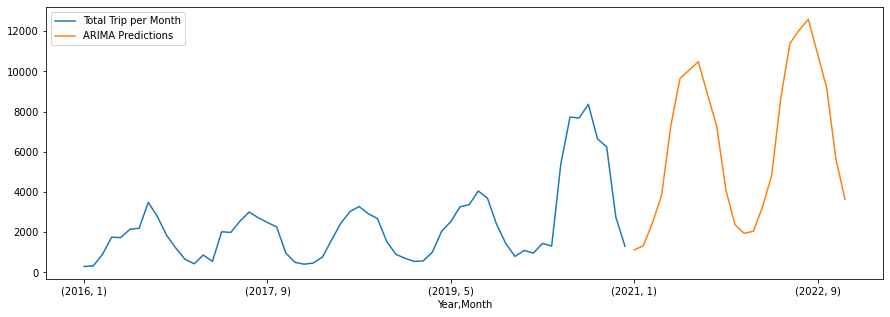

In [135]:
# Unknown User graph 2016-2020 and the future value 2021-2022
future_df = pred2.to_frame()
future_df.index = pd.MultiIndex.from_arrays([future_df.index.year, future_df.index.month], names=['Year','Month'])
future_df = pd.concat([df5_dup2, future_df])
future_df.plot(figsize=(15,5))

In [136]:
# Predict the next year and month (2021) male use bike service
import statsmodels.api as sm
model4 = sm.tsa.statespace.SARIMAX(df5_dup3, order=(1,0,2),seasonal_order=(1,1,1,12))
model4 = model4.fit()
index_future_dates = pd.date_range(start='2021-1',end='2022-12',freq='MS')
pred3 = model4.predict(start=len(df5_dup3),end=len(df5_dup3)+23,dynamic=True).rename('ARIMA Predictions')
pred3.index = index_future_dates
print(pred3)

2021-01-01     7484.421762
2021-02-01     7813.241993
2021-03-01     9544.692076
2021-04-01    13057.808050
2021-05-01    17651.059147
2021-06-01    21194.519274
2021-07-01    23745.928253
2021-08-01    26744.913996
2021-09-01    26203.197455
2021-10-01    25360.487358
2021-11-01    16575.348999
2021-12-01    10831.475253
2022-01-01    12946.626700
2022-02-01    12167.926237
2022-03-01    11196.885785
2022-04-01    10486.151400
2022-05-01    15982.929445
2022-06-01    20658.687902
2022-07-01    22793.865219
2022-08-01    25696.132250
2022-09-01    24992.544902
2022-10-01    25857.828972
2022-11-01    15233.413281
2022-12-01     9636.712664
Freq: MS, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Year,Month'>

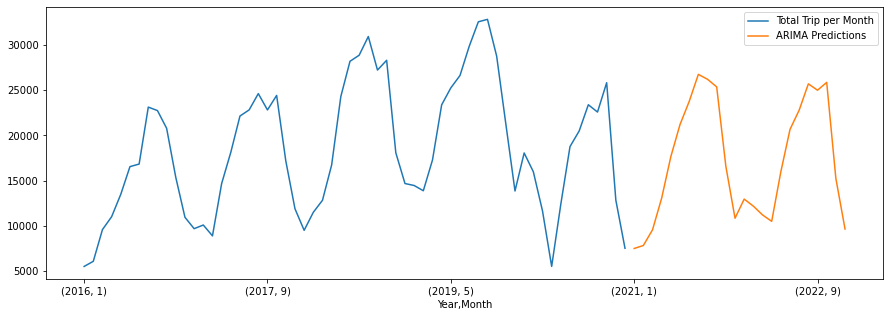

In [137]:
## Male User graph 2016-2020 and the future value 2021-2022
future_df = pred3.to_frame()
future_df.index = pd.MultiIndex.from_arrays([future_df.index.year, future_df.index.month], names=['Year','Month'])
future_df = pd.concat([df5_dup3, future_df])
future_df.plot(figsize=(15,5))

In [138]:
# Predict the next year and month (2021) female use bike service
import statsmodels.api as sm
model5 = sm.tsa.statespace.SARIMAX(df5_dup4, order=(1,1,0),seasonal_order=(1,1,1,12))
model5 = model5.fit()
index_future_dates = pd.date_range(start='2021-1',end='2022-12',freq='MS')
pred4 = model5.predict(start=len(df5_dup4),end=len(df5_dup4)+23,typ='levels').rename('ARIMA Predictions')
pred4.index = index_future_dates
print(pred4)

2021-01-01    2980.238968
2021-02-01    2475.639532
2021-03-01    2568.354584
2021-04-01    3158.991014
2021-05-01    5434.216540
2021-06-01    7386.952396
2021-07-01    7933.343234
2021-08-01    9102.708064
2021-09-01    9077.183470
2021-10-01    8495.694388
2021-11-01    4575.999095
2021-12-01    2101.447726
2022-01-01    3031.549084
2022-02-01    2410.384652
2022-03-01    1994.664698
2022-04-01    1657.566759
2022-05-01    4729.762728
2022-06-01    7082.412443
2022-07-01    7451.044914
2022-08-01    8554.314793
2022-09-01    8408.854305
2022-10-01    8182.405642
2022-11-01    3626.576575
2022-12-01    1121.643340
Freq: MS, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Year,Month'>

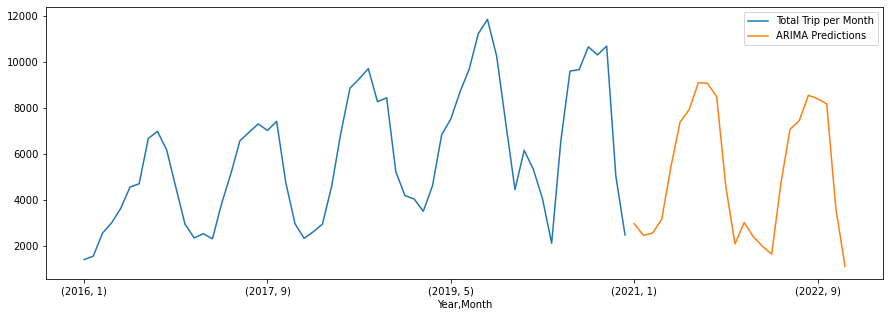

In [139]:
#Female User graph 2016-2020 and the future value 2021-2022
future_df = pred4.to_frame()
future_df.index = pd.MultiIndex.from_arrays([future_df.index.year, future_df.index.month], names=['Year','Month'])
future_df = pd.concat([df5_dup4, future_df])
future_df.plot(figsize=(15,5))